In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
!pip install scienceplots
import scienceplots as sp
import sys
plt.style.use(['science','notebook','grid'])

In [10]:
x_train = np.array([1,2])
y_train = np.array([200,500])

# Documentation for `compute_cost_vectorized` Function

## Description
The `compute_cost_vectorized` function calculates the cost (or loss) of a linear regression model using vectorized operations.

## Parameters
- `x` (numpy array): Input features with shape (n, m), where n is the number of examples and m is the number of features.
- `y` (numpy array): True labels with shape (n, 1), where n is the number of examples.
- `w` (numpy array): Weight vector with shape (m, 1), representing the weights for each feature.
- `b` (float): Bias term.

## Formula
The cost is computed using the mean squared error (MSE) formula:

\[ J(w, b) = \frac{1}{2n} \sum_{i=1}^{n} (w \cdot x_i + b - y_i)^2 \]

Where:
- \( n \) is the number of examples.
- \( x_i \) is the feature vector for the \( i^{th} \) example.
- \( y_i \) is the true label for the \( i^{th} \) example.
- \( w \) is the weight vector.
- \( b \) is the bias term.

## Returns
- `total_cost` (float): The computed cost using the given input data and model parameters.

## Example
```python
import numpy as np

# Example data
x = np.array([[1, 2], [2, 3], [3, 4]])
y = np.array([[5], [8], [11]])
w = np.array([[2], [1]])
b = 1.5

# Calculate the cost
cost = compute_cost_vectorized(x, y, w, b)
print("Cost:", cost)


In [11]:
def compute_cost_vectorized(x, y, w, b):
    n = x.shape[0]
    total_cost = np.sum((w * x + b - y) ** 2) / (2 * n)
    return total_cost


In [17]:
cost = compute_cost_vectorized(x_train, y_train, 300, -100)
print(f"cost is {cost}")

cost is 0.0


# Documentation for Gradient Descent Optimization

## Description
The provided code implements gradient descent optimization to find the optimal parameters (weights \(w\) and bias \(b\)) for a linear regression model. The optimization process aims to minimize the cost function by iteratively updating the parameters.

## Parameters
- `x_train` (numpy array): Input features for training with shape (n, m), where \(n\) is the number of examples and \(m\) is the number of features.
- `y_train` (numpy array): True labels for training with shape (n, 1), where \(n\) is the number of examples.
- `w` (float): Initial weight parameter.
- `b` (float): Initial bias parameter.
- `alpha` (float): Learning rate, controlling the step size in each iteration.

## Variables
- `prev_cost` (float): Cost from the previous iteration.
- `current_cost` (float): Cost from the current iteration.
- `count` (int): Iteration counter.
- `w_history` (list): List to store the history of weight values during optimization.
- `b_history` (list): List to store the history of bias values during optimization.

## Optimization Loop
The optimization loop continues until the absolute difference between the current and previous costs is less than \$$(1 \times 10^{-5}\)$$.

## Gradient Descent Update Formulas

The weight parameter \(w\) is updated using the following formula:

$$ w = w - \alpha \cdot \frac{\sum_{i=1}^{n} (w \cdot x_i + b - y_i) \cdot x_i}{n} $$

Where:
- \( \alpha \) is the learning rate.
- \( n \) is the number of examples.
- \( x_i \) is the feature vector for the \(i^{th}\) example.
- \( y_i \) is the true label for the \(i^{th}\) example.

The bias term \(b\) is updated using the formula:

$$ b = b - \alpha \cdot \frac{\sum_{i=1}^{n} (w \cdot x_i + b - y_i)}{n} $$

Where:
- \( alpha \) is the learning rate.
- \( n \) is the number of examples.
- \( x_i \) is the feature vector for the \(i^{th}\) example.
- \( y_i \) is the true label for the \(i^{th}\) example.



In [87]:
prev_cost = 0
current_cost = 10
count = 0
b = -10
w = 30
alpha = 1

w_history = []
b_history = []

while abs(current_cost - prev_cost) > 1e-5:
    count = count + 1
    prev_cost = current_cost

    current_cost = compute_cost_vectorized(x_train, y_train, w, b)


    w_history.append(w)
    b_history.append(b)

    if(current_cost <= 1e-5):
     break


    w = w - alpha * ((np.sum((w * x_train + b- y_train) * x_train)) / x_train.shape[0])
    b = b - alpha * ((np.sum(w * x_train + b- y_train)) / x_train.shape[0])


print(w)
print(b)
print(count)
print(current_cost)

300.0085816193379
-100.01287242900689
38
9.205523807614617e-06


In [95]:
def predict(number):
  return w*number + b

In [96]:
ans = predict(2)
print(ans)

500.00429080966893


In [97]:
ans = predict(4)
print(ans)

1100.0214540483448


# Conclusions

## Initial Exploration:

- The cost function plot provides insights into the relationship between the weight parameter \(w\) and the cost.
- The scatter plot of gradient descent steps illustrates how the algorithm iteratively updates \(w\) to minimize the cost.

## Convergence Check:

- Observe how the cost decreases as the optimization progresses. The convergence is achieved when the cost reaches a minimum or plateaus.

## Gradient Descent Path:

- Analyze the path of the red markers to understand how the algorithm navigates the weight space. Steeper slopes indicate larger steps, while flatter regions suggest smaller steps.

## Optimal Weight:

- Identify the weight value where the cost is minimized. This value represents the optimal weight for the linear regression model.

## Further Analysis:

- Consider experimenting with different learning rates (\(alpha\)) to observe their impact on convergence and the shape of the cost function.

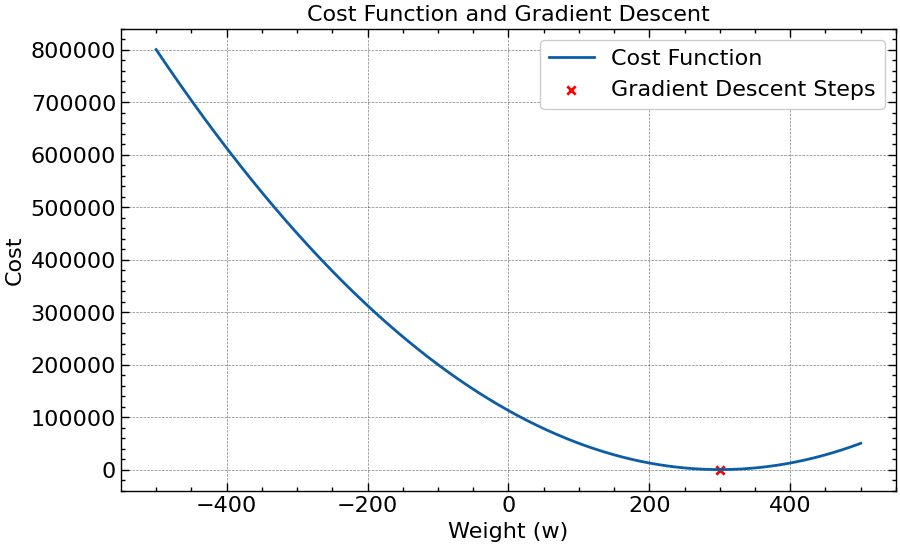

In [77]:



w_values = np.linspace(-500, 500, 1000)


cost_values = np.zeros_like(w_values)

for i, w_test in enumerate(w_values):
    cost_values[i] = compute_cost_vectorized(x_train, y_train, w_test, b)


plt.figure(figsize=(10, 6))
plt.plot(w_values, cost_values, label='Cost Function')
plt.scatter(w, current_cost, color='red', marker='x', label='Gradient Descent Steps')
plt.xlabel('Weight (w)')
plt.ylabel('Cost')
plt.title('Cost Function and Gradient Descent')
plt.legend()
plt.show()

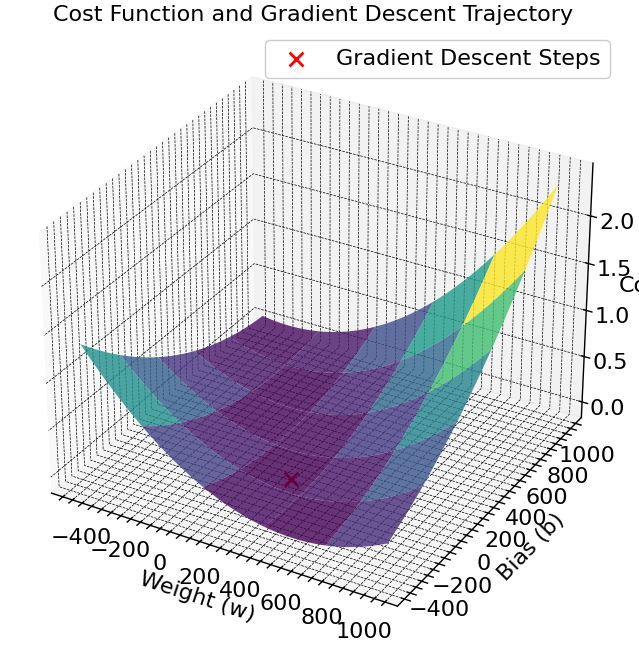

In [94]:
w_values = np.linspace(-500, 1000, 500)
b_values = np.linspace(-500, 1000, 500)


W, B = np.meshgrid(w_values, b_values)


cost_values = np.zeros_like(W)

for i in range(len(w_values)):
    for j in range(len(b_values)):
        cost_values[j, i] = compute_cost_vectorized(x_train, y_train, W[j, i], B[j, i])


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, cost_values, cmap='viridis', alpha=0.8, rstride=100, cstride=100)


ax.scatter(w, b, current_cost, color='red', marker='x', s=100, label='Gradient Descent Steps')

ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost')
ax.set_title('Cost Function and Gradient Descent Trajectory')
ax.legend()

plt.show()

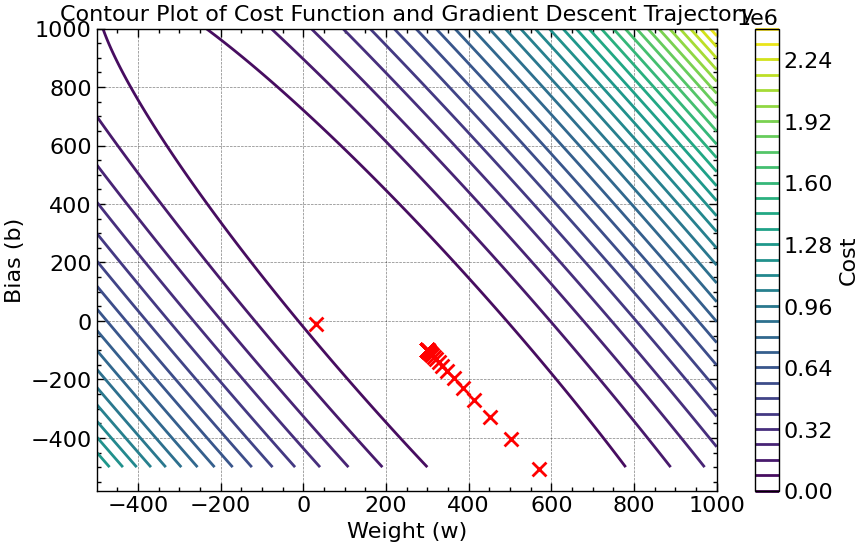

In [93]:


w_values = np.linspace(-500, 1000, 500)
b_values = np.linspace(-500, 1000, 500)


W, B = np.meshgrid(w_values, b_values)


cost_values = np.zeros_like(W)

for i in range(len(w_values)):
    for j in range(len(b_values)):
        cost_values[j, i] = compute_cost_vectorized(x_train, y_train, W[j, i], B[j, i])


plt.figure(figsize=(10, 6))
contour_plot = plt.contour(W, B, cost_values, levels=30, cmap='viridis')
plt.colorbar(contour_plot, label='Cost')


for i in range(len(w_history)):
    plt.scatter(w_history[i], b_history[i], color='red', marker='x', s=100, label=f'Step {i+1}')

plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Contour Plot of Cost Function and Gradient Descent Trajectory')
plt.show()
